## **Text Classification by Fine-tuning Language Model**

### **SECTION 1:Data Loading and Exploration**

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 670.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00
   

In [ ]:
!pip install simpletransformers transformers

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import torch
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
uploaded = files.upload()

Saving gauravdataset850.csv to gauravdataset850.csv


In [ ]:
df = pd.read_csv('gauravdataset850.csv')
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['Category'].value_counts())

Dataset Head:
                      course title    Category
0  Data Structures and Algorithms   Technical
1  Leadership and Team Management    Business
2       3D Animation with Blender    Creative
3   Psychology and Human Behavior  Humanities
4      Web Development with React   Technical

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   course title  848 non-null    object
 1   Category      848 non-null    object
dtypes: object(2)
memory usage: 13.4+ KB
None

Missing Values:
 course title    0
Category        0
dtype: int64

Class Distribution:
 Category
Technical            176
Business             174
Creative             174
Humanities           166
Health & Medicine     54
Social Sciences       54
Science               50
Name: count, dtype: int64


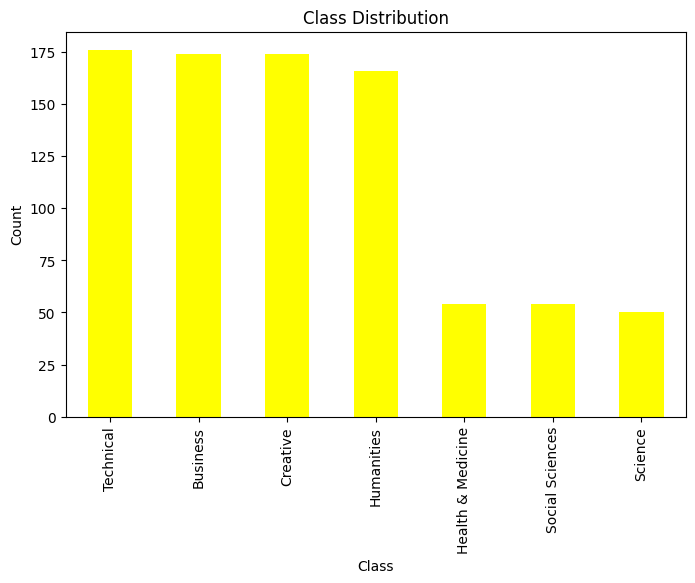

In [ ]:
plt.figure(figsize=(8, 5))
df['Category'].value_counts().plot(kind='bar', color='yellow')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

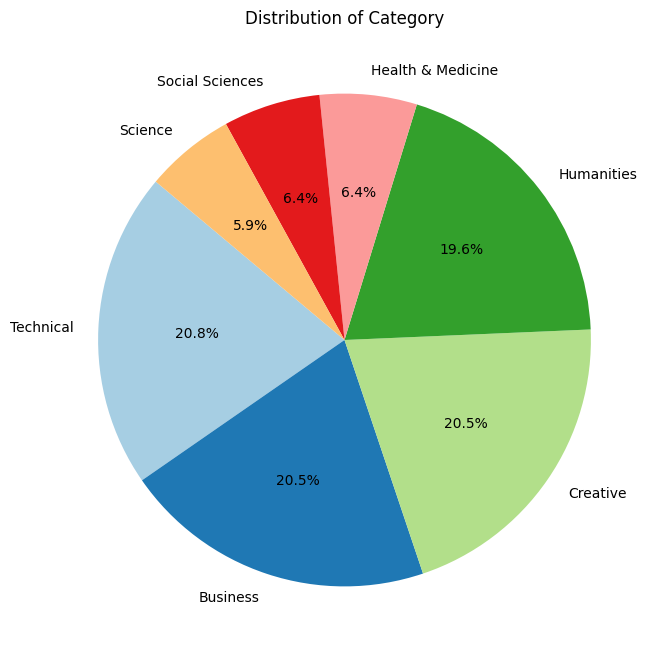

In [ ]:
disease_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Category')
plt.show()

In [ ]:
print(df.columns)


Index(['course title', 'Category'], dtype='object')


In [ ]:
print(train_data.columns)
print(val_data.columns)


Index(['course title', 'Category'], dtype='object')
Index(['course title', 'Category'], dtype='object')


In [ ]:
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

# Creating train_df with correct column names
train_df = pd.DataFrame({
    'text': train_data['course title'],   # Update to 'course title'
    'labels': train_data['Category']      # Update to 'Category'
})

# Creating val_df with correct column names
val_df = pd.DataFrame({
    'text': val_data['course title'],     # Update to 'course title'
    'labels': val_data['Category']        # Update to 'Category'
})


### **SECTION 2: Data Preprocessing**

In [ ]:
df = df.dropna(subset=['Category', 'course title'])
print("Missing values after cleanup:\n", df.isnull().sum())

Missing values after cleanup:
 course title    0
Category        0
dtype: int64


In [ ]:
label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['Category'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:\n", label_mapping)

Label Mapping:
 {'Business': np.int64(0), 'Creative': np.int64(1), 'Health & Medicine': np.int64(2), 'Humanities': np.int64(3), 'Science': np.int64(4), 'Social Sciences': np.int64(5), 'Technical': np.int64(6)}


In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return text

df['cleaned_text'] = df['Description'].apply(clean_text)
print("\nSample Cleaned Text:\n", df[['Description', 'cleaned_text']].head())


Sample Cleaned Text:
                                          Description  \
0  Lately, I have been experiencing symptoms such...   
1  I have noticed persistent painful blisters, pe...   
2  I have noticed persistent itchy patches, redne...   
3  I have noticed persistent itchy patches, redne...   
4  Lately, I have been experiencing symptoms such...   

                                        cleaned_text  
0  lately i have been experiencing symptoms such ...  
1  i have noticed persistent painful blisters pee...  
2  i have noticed persistent itchy patches rednes...  
3  i have noticed persistent itchy patches rednes...  
4  lately i have been experiencing symptoms such ...  


In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)



# Apply cleaning function
df['cleaned_course_title'] = df['course title'].apply(clean_text)

# Print sample output
print("\nSample Cleaned Text:\n", df[['course title', 'cleaned_course_title']].head())


Sample Cleaned Text:
                      course title        cleaned_course_title
0  Data Structures and Algorithms    data structure algorithm
1  Leadership and Team Management  leadership team management
2       3D Animation with Blender        3d animation blender
3   Psychology and Human Behavior   psychology human behavior
4      Web Development with React       web development react


In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['labels'])
rain_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
print("Training Set Size:", len(train_df))
print("Validation Set Size:", len(val_df))

Training Set Size: 678
Validation Set Size: 170


### SECTION 3: Text Embedding using BERT and RoBER

In [ ]:
print(df.columns)  # This will show all available column names
df['cleaned_text'] = df['course title'].astype(str).apply(clean_text)
print(df.head())  # See if "course title" is correctly loaded



Index(['course title', 'Category', 'labels', 'cleaned_course_title',
       'cleaned_text'],
      dtype='object')
                     course title    Category  labels  \
0  Data Structures and Algorithms   Technical       6   
1  Leadership and Team Management    Business       0   
2       3D Animation with Blender    Creative       1   
3   Psychology and Human Behavior  Humanities       3   
4      Web Development with React   Technical       6   

         cleaned_course_title                cleaned_text  
0    data structure algorithm    data structure algorithm  
1  leadership team management  leadership team management  
2        3d animation blender        3d animation blender  
3   psychology human behavior   psychology human behavior  
4       web development react       web development react  


In [ ]:
# Prepare training data
train_df = df[['cleaned_text', 'labels']]
train_df.columns = ['text', 'labels']
num_classes = df['labels'].nunique()

# Initialize models
bert_model = ClassificationModel('bert', 'bert-base-uncased', num_labels=num_classes, use_cuda=False)
roberta_model = ClassificationModel('roberta', 'roberta-base', num_labels=num_classes, use_cuda=False)
distilbert_model = ClassificationModel("distilbert", "distilbert-base-uncased", num_labels=num_classes, use_cuda=False)

# Print sample data
print("\nSample Processed Data:\n", train_df.head())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]


Sample Processed Data:
                          text  labels
0    data structure algorithm       6
1  leadership team management       0
2        3d animation blender       1
3   psychology human behavior       3
4       web development react       6


### **SECTION 4: Model Training**

In [ ]:
model_args = ClassificationArgs(
    num_train_epochs=3,
    train_batch_size=4,
    eval_batch_size=4,
    gradient_accumulation_steps=2,
    learning_rate=3e-5,
    max_seq_length=128,
    weight_decay=0.01,
    save_steps=-1,
    overwrite_output_dir=True,
    use_multiprocessing=False
)
bert_model = ClassificationModel("bert", "bert-base-uncased", num_labels=num_classes, args=model_args, use_cuda=False)
print("Training BERT Model")
bert_model.train_model(train_df)
print("BERT Training Completed")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training BERT Model


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/212 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/212 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/212 [00:00<?, ?it/s]

BERT Training Completed


In [ ]:
roberta_model = ClassificationModel("roberta", "roberta-base", num_labels=num_classes, args=model_args, use_cuda=False)
print("Training RoBERTa Model")
roberta_model.train_model(train_df)
print("RoBERTa Training Completed")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training RoBERTa Model


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/212 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/212 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/212 [00:00<?, ?it/s]

In [ ]:
distilbert_model = ClassificationModel("distilbert", "distilbert-base-uncased", num_labels=num_classes, args=model_args, use_cuda=False)
print("\n Training DistilBERT Model")
distilbert_model.train_model(train_df)
print(" DistilBERT Training Completed")

### **SECTION 5: Evaluating on Validation Set**


In [ ]:
from sklearn.metrics import classification_report
val_df = val_df[['course title', 'labels']]
# Evaluate BERT Model
print("\nEvaluating BERT Model...")
result_bert, model_outputs_bert, wrong_predictions_bert = bert_model.eval_model(val_df)
print("BERT Model Evaluation Results:", result_bert)

# Evaluate RoBERTa Model
print("\nEvaluating RoBERTa Model...")
result_roberta, model_outputs_roberta, wrong_predictions_roberta = roberta_model.eval_model(val_df)
print("RoBERTa Model Evaluation Results:", result_roberta)

# Display detailed classification report
true_labels = val_df["labels"].tolist()
pred_labels_bert = model_outputs_bert.argmax(axis=1)
pred_labels_roberta = model_outputs_roberta.argmax(axis=1)

print("\nBERT Classification Report:")
print(classification_report(true_labels, pred_labels_bert))

print("\nRoBERTa Classification Report:")
print(classification_report(true_labels, pred_labels_roberta))



Evaluating BERT Model...


/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/60 [00:00<?, ?it/s]

BERT Model Evaluation Results: {'mcc': np.float64(0.7236866301932118), 'eval_loss': 2.202950417995453}

Evaluating RoBERTa Model...


/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/60 [00:00<?, ?it/s]

RoBERTa Model Evaluation Results: {'mcc': np.float64(0.9830411443754369), 'eval_loss': 0.4614776074886322}

BERT Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       1.00      1.00      1.00         8
           2       0.00      0.00      0.00         8
           3       1.00      0.75      0.86         8
           4       1.00      0.75      0.86         8
           5       0.00      0.00      0.00         8
           6       0.73      1.00      0.84         8
           7       0.23      1.00      0.37         8
           8       1.00      0.75      0.86         8
           9       1.00      1.00      1.00         8
          10       1.00      0.50      0.67         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SECTION 6: Saving the Best Model

In [ ]:
bert_model.model.save_pretrained("bert_model")
bert_model.tokenizer.save_pretrained("bert_model")
print("BERT model saved manually!")

roberta_model.model.save_pretrained("roberta_model")
roberta_model.tokenizer.save_pretrained("roberta_model")
print("RoBERTa model saved manually!")

BERT model saved manually!
RoBERTa model saved manually!


###SECTION 7: Prediction on Real-World Input

### Prediction Using BERT Model

In [ ]:
bert_model = ClassificationModel('bert', 'bert_model', use_cuda=False)

def predict_category(course_title):
    cleaned_text = clean_text(course_title)
    predictions, raw_outputs = roberta_model.predict([cleaned_text])
    predicted_category = label_encoder.inverse_transform([predictions[0]])[0]
    return predicted_category

test_course_title = input("Enter the course title: ")
predicted_category = predict_category(test_course_title)

print(f"\nCourse Title: {test_course_title}")
print(f"Predicted Category: {predicted_category}\n")

Enter the description: I have noticed persistent heartburn, acid reflux, and chest pain for the past few weeks. It has been affecting my daily routine, making it difficult to sleep peacefully. Sometimes, I also experience dizziness. The symptoms seem to fluctuate, but overall, they have been getting worse. Seeking medical attention seems necessary at this point.


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Symptoms: I have noticed persistent heartburn, acid reflux, and chest pain for the past few weeks. It has been affecting my daily routine, making it difficult to sleep peacefully. Sometimes, I also experience dizziness. The symptoms seem to fluctuate, but overall, they have been getting worse. Seeking medical attention seems necessary at this point.
🩺 Predicted Disease: GERD



### **Prediction Using RoBERTa Model**

In [ ]:
roberta_model = ClassificationModel('bert', 'bert_model', use_cuda=False)

def predict_disease1(description):
    cleaned_text = clean_text(description)
    predictions, raw_outputs = bert_model.predict([cleaned_text])
    predicted_disease = label_encoder.inverse_transform([predictions[0]])[0]
    return predicted_disease

# Get user input
test_description = input("Enter the description: ")
predicted_disease = predict_disease1(test_description)

print(f"\nSymptoms: {test_description}")
print(f"Predicted Disease: {predicted_disease}\n")

Enter the description: For the past few days, I have been suffering from rashes, swelling, and fever. The discomfort is making it difficult for me to sleep peacefully. Along with that, I feel tired, which adds to the struggle. I have tried some home remedies, but the symptoms persist. It's becoming clear that I need medical advice.


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Symptoms: For the past few days, I have been suffering from rashes, swelling, and fever. The discomfort is making it difficult for me to sleep peacefully. Along with that, I feel tired, which adds to the struggle. I have tried some home remedies, but the symptoms persist. It's becoming clear that I need medical advice.
Predicted Disease: Drug Reaction

